In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d   
coin_id                                                                    
bitcoin                              1.08388                     7.60278  \
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d   
coin_id                                                                     
bitcoin                              6.57509                      7.67258  \
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d   
coin_id                                                                      
bitcoin                             -3.25185                      83.51840  \
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [3]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d   
count                    41.000000                   41.000000  \
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d   
count                    41.000000                    41.000000  \
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d   
count                    41.000000                     41.000000  \
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])

In [6]:
# Create a DataFrame with the scaled data
df_market_scaled=pd.DataFrame(df_market_data_scaled, 
                             columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                       'price_change_percentage_14d', 'price_change_percentage_30d',
                                       'price_change_percentage_60d', 'price_change_percentage_200d',
                                       'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_scaled['Crypto_names']=df_market_data.index
# Set the coinid column as index
df_market_scaled=df_market_scaled.set_index('Crypto_names')

# Display sample data
df_market_scaled.head(10)

price_change_percentage_24h  price_change_percentage_7d   
Crypto_names                                                               
bitcoin                             0.508529                    0.493193  \
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d   
Crypto_names                                                                
bitcoin                             0.772200                     0.235460  \
ethereum                            0.558692                    -0.054341   
tether                             -0.021680                    -0.061030   
ripple                              0.249458                    -0.050388   
bitcoin-cash                        1.760610                     0.545842   
binancecoin                         0.800214                    -0.057148   
chainlink                           1.101647                    -0.490495   
cardano                             0.648885                     0.328959   
litecoin                            0.858520                    -0.012646   
bitcoin-cash-sv                    -0.248043                     0.051634   

                 price_change_percentage_60d  price_change_percentage_200d   
Crypto_names                                                                 
bitcoin                            -0.067495                     -0.355953  \
ethereum                           -0.273483                     -0.115759   
tether                              0.008005                     -0.550247   
ripple                             -0.373164                     -0.458259   
bitcoin-cash                       -0.291203                     -0.499848   
binancecoin                         0.778653                     -0.188232   
chainlink                          -0.931954                      0.387759   
cardano                            -0.486349                      0.065080   
litecoin                           -0.366477                     -0.486266   
bitcoin-cash-sv                    -0.529666                     -0.532961   

                 price_change_percentage_1y  
Crypto_names                                 
bitcoin                           -0.251637  
ethereum                          -0.199352  
tether                            -0.282061  
ripple                            -0.295546  
bitcoin-cash                      -0.270317  
binancecoin                       -0.225533  
chainlink                         -0.018284  
cardano                           -0.155428  
litecoin                          -0.292351  
bitcoin-cash-sv                   -0.206029

---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,11))

In [12]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values:
      # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters = i, random_state = 0)
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(df_market_scaled)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_original": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_original = pd.DataFrame(elbow_data)

<Axes: title={'center': 'Elbow Curve'}, xlabel='k_original'>

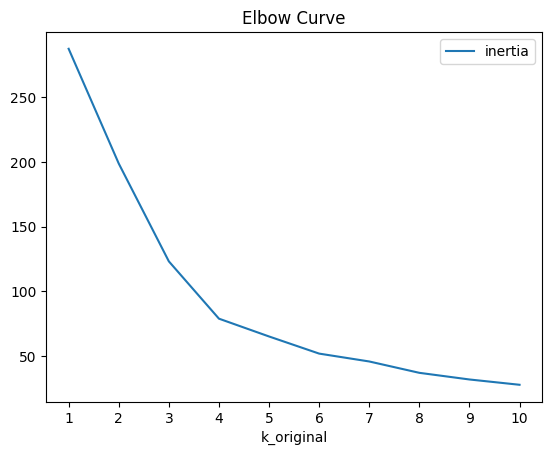

In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow_original.plot.line( x = 'k_original', y = 'inertia', title = 'Elbow Curve', xticks = k)
elbow_plot

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [16]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_predictions = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
kmeans_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [18]:
# Create a copy of the DataFrame
df_prediction_market_scaled=df_market_scaled.copy()

In [22]:
# Add a new column to the DataFrame with the predicted clusters
df_prediction_market_scaled['Prediction']=kmeans_predictions

# Display sample data
df_prediction_market_scaled.sample()

price_change_percentage_24h  price_change_percentage_7d   
Crypto_names                                                            
monero                           0.262723                    1.792602  \

              price_change_percentage_14d  price_change_percentage_30d   
Crypto_names                                                             
monero                           2.202665                     1.437842  \

              price_change_percentage_60d  price_change_percentage_200d   
Crypto_names                                                              
monero                           0.893865                     -0.155893  \

              price_change_percentage_1y  Prediction  
Crypto_names                                          
monero                         -0.167644           2

<Axes: title={'center': 'Crypto Currency Clustered'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

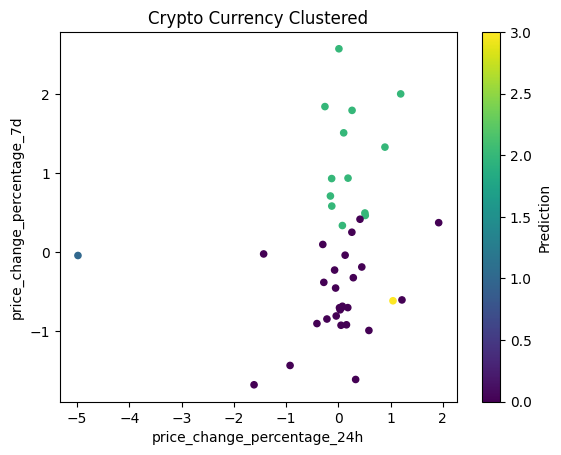

In [25]:
# Create a scatter plot using hvPlot by setting 

# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

Scatter_w_cluster = df_prediction_market_scaled.plot.scatter(
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
    x = 'price_change_percentage_24h', y = 'price_change_percentage_7d',
    c = 'Prediction', colormap='viridis',
    title = 'Crypto Currency Clustered'
)
Scatter_w_cluster

---

### Optimize Clusters with Principal Component Analysis.

In [26]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [27]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [20]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11


In [22]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [23]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k


In [26]:
# Fit the K-Means model using the PCA data

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 